In [9]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [11]:
df = pd.read_csv("/content/breast-cancer.csv")

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.shape

(569, 32)

In [14]:
df = df.drop(["id"] , axis = 1)
df.shape

(569, 31)

In [15]:
df["diagnosis"] = df["diagnosis"].map({"M" : 0 , "B" : 1})
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
497,1,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,...,14.06,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
179,1,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,...,13.63,16.15,86.70,570.7,0.11620,0.05445,0.02758,0.03990,0.1783,0.07319
219,0,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
191,1,12.770,21.41,82.02,507.4,0.08749,0.06601,0.031120,0.028640,0.1694,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
346,1,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,0.1555,...,13.64,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083
124,1,13.370,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,0.1422,...,14.26,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
258,0,15.660,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,...,19.85,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
294,1,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,...,13.50,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
416,1,9.405,21.70,59.60,271.2,0.10440,0.06159,0.020470,0.012570,0.2025,...,10.85,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304
326,1,14.110,12.88,90.03,616.5,0.09309,0.05306,0.017650,0.027330,0.1373,...,15.53,18.00,98.40,749.9,0.12810,0.11090,0.05307,0.05890,0.2100,0.07083


In [16]:
X = df.iloc[: , 1 :]
y = df.iloc[: , 0]

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,  random_state=42)

## **ANN Architecture :**

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.activations import relu , sigmoid

In [22]:
model = Sequential()

In [26]:
model.add(Dense(units = 64 , activation=relu , kernel_initializer= "glorot_uniform" , input_dim = X_train.shape[1]))  # 1st Layer
# Units is nothing but the no of neurons in each layer .
# in 1st layer we need to mention the no of input values as "input_dim"
model.add(Dense(units = 32 , activation=relu , kernel_initializer= "glorot_uniform"))  # 2nd Layer
model.add(Dense(units = 16 , activation=relu , kernel_initializer= "glorot_uniform"))  # 3rd Layer
model.add(Dense(units = 8 , activation=relu , kernel_initializer= "glorot_uniform"))  # 4th Layer
model.add(Dense(units = 4 , activation=relu , kernel_initializer= "glorot_uniform"))  # 5th Layer

model.add(Dense(units=1,kernel_initializer='he_uniform',activation=sigmoid))  # Output Layer  "units = 1. because, the target is in binary classification"

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,782 (42.12 KB)

 Trainable params: 10,782 (42.12 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="adam" , loss = "binary_crossentropy" , metrics = ["Accuracy"])

**Now We need to fit the model with data**

In [29]:
model.fit(X_train , y_train , batch_size= 20 , validation_split= 0.2 , epochs= 50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.6257 - loss: 0.6402 - val_Accuracy: 0.6374 - val_loss: 0.5866
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6373 - loss: 0.5483 - val_Accuracy: 0.6374 - val_loss: 0.5019
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.5962 - loss: 0.4883 - val_Accuracy: 0.6374 - val_loss: 0.4724
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.7706 - loss: 0.4435 - val_Accuracy: 0.6703 - val_loss: 0.6005
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.8122 - loss: 0.5157 - val_Accuracy: 0.9231 - val_loss: 0.4166
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.9188 - loss: 0.4005 - val_Accuracy: 0.9011 - val_loss: 0.3964
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.9347 - loss: 0.3825 - val_Accuracy: 0.7582 - val_loss: 0.5506
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.7616 - loss: 0.4575 - val_Accuracy: 0.9121 - val_loss

In [30]:
# to get all the results indivisually we use
model.history.history

{'Accuracy': [0.6263736486434937,
  0.6263736486434937,
  0.6263736486434937,
  0.7884615659713745,
  0.8653846383094788,
  0.8983516693115234,
  0.901098906993866,
  0.7884615659713745,
  0.9313187003135681,
  0.9313187003135681,
  0.906593382358551,
  0.8626373410224915,
  0.8626373410224915,
  0.9093406796455383,
  0.9258241653442383,
  0.9148351550102234,
  0.8653846383094788,
  0.9258241653442383,
  0.9148351550102234,
  0.9258241653442383,
  0.9258241653442383,
  0.9120879173278809,
  0.9340659379959106,
  0.9230769276618958,
  0.9258241653442383,
  0.9175823926925659,
  0.9203296899795532,
  0.9285714030265808,
  0.9340659379959106,
  0.9203296899795532,
  0.9340659379959106,
  0.9368131756782532,
  0.9368131756782532,
  0.9258241653442383,
  0.9230769276618958,
  0.942307710647583,
  0.9340659379959106,
  0.9340659379959106,
  0.9258241653442383,
  0.8736263513565063,
  0.9285714030265808,
  0.9368131756782532,
  0.9230769276618958,
  0.9395604133605957,
  0.9313187003135681,
 

In [31]:
model.history.history["Accuracy"]

[0.6263736486434937,
 0.6263736486434937,
 0.6263736486434937,
 0.7884615659713745,
 0.8653846383094788,
 0.8983516693115234,
 0.901098906993866,
 0.7884615659713745,
 0.9313187003135681,
 0.9313187003135681,
 0.906593382358551,
 0.8626373410224915,
 0.8626373410224915,
 0.9093406796455383,
 0.9258241653442383,
 0.9148351550102234,
 0.8653846383094788,
 0.9258241653442383,
 0.9148351550102234,
 0.9258241653442383,
 0.9258241653442383,
 0.9120879173278809,
 0.9340659379959106,
 0.9230769276618958,
 0.9258241653442383,
 0.9175823926925659,
 0.9203296899795532,
 0.9285714030265808,
 0.9340659379959106,
 0.9203296899795532,
 0.9340659379959106,
 0.9368131756782532,
 0.9368131756782532,
 0.9258241653442383,
 0.9230769276618958,
 0.942307710647583,
 0.9340659379959106,
 0.9340659379959106,
 0.9258241653442383,
 0.8736263513565063,
 0.9285714030265808,
 0.9368131756782532,
 0.9230769276618958,
 0.9395604133605957,
 0.9313187003135681,
 0.9285714030265808,
 0.8736263513565063,
 0.9175823926925

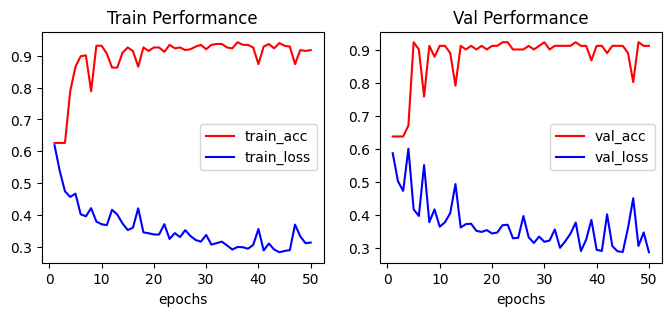

In [33]:
# to observe graphically

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('Train Performance')
plt.xlabel('epochs')
plt.plot(np.arange(1,51),model.history.history['Accuracy'],color='r',label='train_acc')
plt.plot(np.arange(1,51),model.history.history['loss'],color='b',label='train_loss')

plt.legend(loc=0)

plt.subplot(1,2,2)
plt.title('Val Performance')
plt.xlabel('epochs')
plt.plot(np.arange(1,51),model.history.history['val_Accuracy'],color='r',label='val_acc')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='b',label='val_loss')

plt.legend(loc=0)

plt.show()

**From above plot we can observe that the accuracy is gradually increasing and the loss is gradually decreasing.**

In [35]:
# testing the model with test data.

preds = model.predict(X_test)
# model give us sigmoid values we need to convert into labels according to sigmoid condition.
d = []
for i in preds :
  if i > 0.5 :
    d.append(1)
  else :
    d.append(0)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [36]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [37]:
accuracy_score(y_test , d)

0.956140350877193

In [38]:
confusion_matrix(y_test , d)

array([[40,  3],
       [ 2, 69]])

In [39]:
print(classification_report(y_test , d))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

